El objetivo es calcular los coeficientes A+ y A- en base a los valores de las distintas frecuencias involucradas y del detuning debido al laser. Defino una función para calcular G y otra que calcula A+ y A- en base a G

$$G(\nu,\omega,\lambda)=\frac{-\chi^2 \alpha^2}{\lambda + i\nu_0} + i\epsilon C $$,

en particular me interesa conocer el valor de G con y sin la corrección.

$$C=\frac{(\lambda+i\nu_0)^2 - \omega^2}{((\lambda+i\nu_0)^2 + \omega^2)^2} $$

Programo una función G y una función G más la corrección. $\chi$ y $\alpha$ se definen como constantes globales. Se trabaja con $\frac{\delta}{\nu_0} = a$ como la variable, haciendo la sustitución se llega a que la corrección es


$$C=\frac{(-k+i\nu_0(a+1))^2 - \omega^2}{((-k+i\nu_0(a+1))^2 + \omega^2)^2} $$

y se toma un rango de $a \in [-2,2]$ para los calculos. Todos los parámetros se definen en terminos de $\nu_0$




In [27]:
#Calcular temperatura

nu0=1000
m=500
chi = 1
alpha =1
k = .5*nu0 #kappa es el decaimiento de la cavidad
w = nu0/m;
ep=nu0/10 #El valor de epsilon

function Aminus(a,epsilon)
    k*chi*alpha/(k^2+nu0^2*(a+1)^2)+real(im*epsilon*((-k+im*nu0*(a+1))^2-4*w^2)/((-k+im*nu0*(a+1))^2+4*w^2)^2)
end

function Aplus(a,epsilon)
    k*chi*alpha/(k^2+nu0^2*(a-1)^2)+real(im*epsilon*((-k+im*nu0*(a-1))^2-4*w^2)/((-k+im*nu0*(a-1))^2+4*w^2)^2)
end
n=6
mesh =2^n
y=Vector(undef,2^(n+2)+1)
ye=Vector(undef,2^(n+2)+1)
x=Vector(undef,2^(n+2)+1)
temp=Vector(undef,2^(n+2)+1)
tempe=Vector(undef,2^(n+2)+1)
i=1
plotvariable=zeros(6,2^(n+2)+1)
asdf=[]

for j=0:1:5
    for a=-2:1/mesh:2
        temp[i]=Aplus(a,0)/(Aminus(a,0)-Aplus(a,0))
        tempe[i]=Aplus(a,ep*j)/(Aminus(a,ep*j)-Aplus(a,ep*j))  
        x[i]=a
        plotvariable[j+1,i]=tempe[i]
        i+=1
    end
    push!(asdf,plotvariable[j+1,:])
    i=1
end

println(nu0)
println(w)
println(ep)
println(m)



1000
2.0
100.0
500


In [5]:
#Calcular A

nu0=1000000
m=round(Int,sqrt(.5*nu0))
chi = 1
alpha =1
k = .5*nu0 #kappa es el decaimiento de la cavidad
w = nu0/m;
ep=(m^2)/5 #El valor de epsilon

function Aminus(a,epsilon)
    k*chi*alpha/(k^2+nu0^2*(a+1)^2)+real(im*epsilon*((-k+im*nu0*(a+1))^2-4*w^2)/((-k+im*nu0*(a+1))^2+4*w^2)^2)
end

function Aplus(a,epsilon)
    k*chi*alpha/(k^2+nu0^2*(a-1)^2)+real(im*epsilon*((-k+im*nu0*(a-1))^2-4*w^2)/((-k+im*nu0*(a-1))^2+4*w^2)^2)
end
n=6
mesh =2^n
y=Vector(undef,2^(n+2)+1)
ye=Vector(undef,2^(n+2)+1)
x=Vector(undef,2^(n+2)+1)
temp=Vector(undef,2^(n+2)+1)
tempe=Vector(undef,2^(n+2)+1)
i=1
plotvariable=zeros(6,2^(n+2)+1)
asdf=[]

for j=0:1:5
    for a=-2:1/mesh:2
        temp[i]=Aplus(a,0)/(Aminus(a,0)-Aplus(a,0))
        tempe[i]=Aplus(a,ep*j)#/(Aminus(a,ep*j)-Aplus(a,ep*j))  
        x[i]=a
        plotvariable[j+1,i]=tempe[i]
        i+=1
    end
    push!(asdf,plotvariable[j+1,:])
    i=1
end

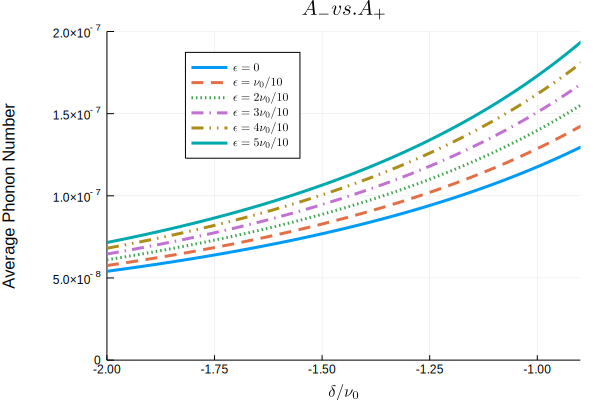

In [9]:
a=plot(x,asdf,
    title=L"A_- vs. A_+",
    xaxis=L"\delta/\nu_0",xlims=(-2,-.9),
    yaxis="Average Phonon Number",ylims=(0,.0000002), 
    linestyle= :auto,linewidth=3,
    legend=:top,
    label=[L"\epsilon=0",L"\epsilon=\nu_0/10",L"\epsilon=2\nu_0/10",L"\epsilon=3\nu_0/10",L"\epsilon=4\nu_0/10",L"\epsilon=5\nu_0/10"])




In [3]:
using LaTeXStrings
using Plots

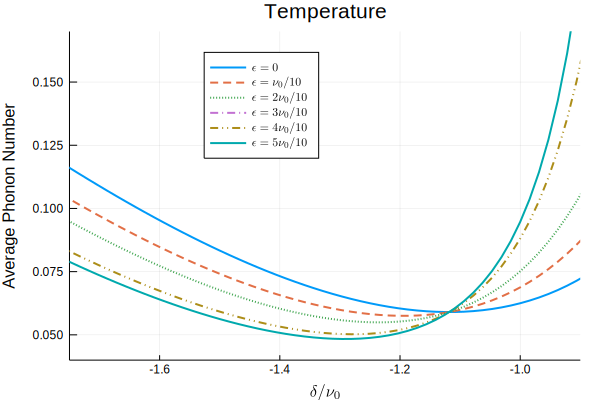

In [28]:
a=plot(x,asdf,
    title="Temperature",
    xaxis=L"\delta/\nu_0",xlims=(-1.75,-.9),
    yaxis="Average Phonon Number",ylims=(0.04,.17),
    linestyle= :auto,linewidth=2,
    legend=:top,
    label=[L"\epsilon=0",L"\epsilon=\nu_0/10",L"\epsilon=2\nu_0/10",L"\epsilon=3\nu_0/10",L"\epsilon=4\nu_0/10",L"\epsilon=5\nu_0/10"]
)

In [29]:
pdf(a)

UndefVarError: UndefVarError: pdf not defined

In [30]:
2+2

4